In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

data=pd.read_csv('anaconda3/envs/NirupDapProject/all_data.csv')
df=pd.DataFrame(data)
print(df)


         center_id                                        center_name  \
0           272807  KASTURBA GIRLS PU COLLEGE, KASTURBA GIRLS PU C...   
1           272807  KASTURBA GIRLS PU COLLEGE, KASTURBA GIRLS PU C...   
2           272807  KASTURBA GIRLS PU COLLEGE, KASTURBA GIRLS PU C...   
3           272807  KASTURBA GIRLS PU COLLEGE, KASTURBA GIRLS PU C...   
4           272807  KASTURBA GIRLS PU COLLEGE, KASTURBA GIRLS PU C...   
...            ...                                                ...   
2333157     250301  AYESHA ALI ACADEMY, KANIPORA KULGAM, J&K, ANAN...   
2333158     250301  AYESHA ALI ACADEMY, KANIPORA KULGAM, J&K, ANAN...   
2333159     250301  AYESHA ALI ACADEMY, KANIPORA KULGAM, J&K, ANAN...   
2333160     250301  AYESHA ALI ACADEMY, KANIPORA KULGAM, J&K, ANAN...   
2333161     250301  AYESHA ALI ACADEMY, KANIPORA KULGAM, J&K, ANAN...   

                 center_city     center_state  serial_no  score  
0        SHIVAMOGA (SHIMOGA)        KARNATAKA          1 

In [4]:
#Total no of students attended NEET Exam 2024
tot_stu=len(df)
print(tot_stu)

2333162


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333162 entries, 0 to 2333161
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   center_id     int64 
 1   center_name   object
 2   center_city   object
 3   center_state  object
 4   serial_no     int64 
 5   score         int64 
dtypes: int64(3), object(3)
memory usage: 106.8+ MB


In [5]:
#Total no of cities part of NEET UG 2024
tot_cities=df['center_city'].nunique()
print(tot_cities)

585


In [6]:
# Total no of centers that were active in NEET UG 2024
tot_centers=df['center_name'].nunique()
print(tot_centers)

4748


In [40]:
# Calculate mean and standard deviation of the 'score' 
mean_score = df['score'].mean()
std_score = df['score'].std()

# Display the results
print(f"Mean Score: {mean_score}")
print(f"Standard Deviation of Score: {std_score}")


Mean Score: 217.1565862121876
Standard Deviation of Score: 166.24000440757197


In [7]:
top_scores=df[df['score'] == 720]
print(top_scores)

         center_id                                        center_name  \
3386        460902  D.A.V SCHOOL, VILLAGE: JOGIVITA FULBARI P.O MA...   
19683       390302  UCCH MADHYMIK BALIKA ADARSH VIDHYA MANDIR, AMB...   
166754      390301  ALPHA INTERNATIONAL ACADEMY, KATARIA FARM, VIS...   
169432      392502  SHRI AATM VALLABH JAIN GIRLS P.G. COLLEGE, HAN...   
188759      390513  KAUTILYA SR. SEC. SCHOOL, NH-27, BYPASS, RAWAT...   
...            ...                                                ...   
2236817     120501  POTTI SRIRAMULU CHALAVADI MALLIKARJUNA RAO COL...   
2240728     410806  ROYAL INTERNL SCH PALLAKKAPALAYAM NAMAKKAL TN,...   
2291690     381404  VIVEK HIGH SCHOOL SECTOR 38-B CHANDIGARH, VIVE...   
2316865     390327  D.C.S INTERNATIONAL SCHOOL, RAGHUNATHPURA (RAT...   
2327666     311407  DAV PUBLIC SCHOOL NERUL, PLOT NO. 34 SECTOR 48...   

                        center_city    center_state  serial_no  score  
3386                       SILIGURI     WEST BENGAL

In [9]:
#Toppers of NEET UG 2024
print(len(top_scores))

61


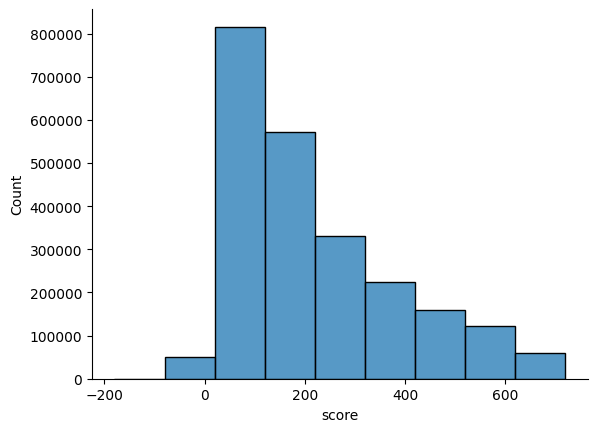

In [9]:
#Marks Distribution 

bins = np.arange(df['score'].min(), 730, 100)

# Create a histogram/bar chart
sb.histplot(data=df, x='score', bins=bins, edgecolor='black')

# Remove spines for a cleaner look
sb.despine()


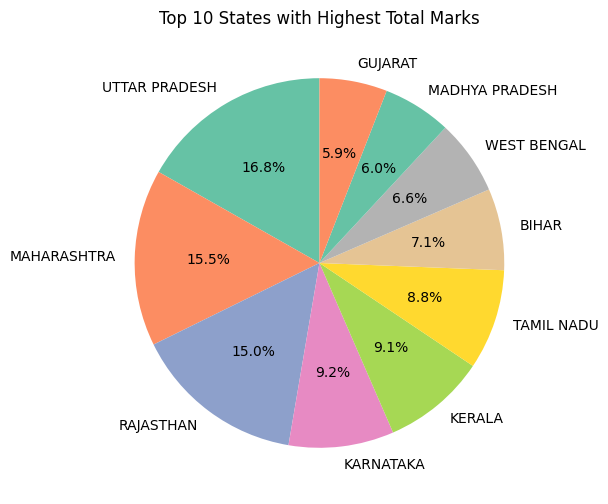

In [32]:
import matplotlib.pyplot as plt

# Get top 10 states with the highest total score
top_10_states_marks = df.groupby('center_state')['score'].sum().nlargest(10)

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(top_10_states_marks, labels=top_10_states_marks.index, autopct='%1.1f%%', colors=plt.cm.Set2.colors, startangle=90)

# Add a title
plt.title('Top 10 States with Highest Total Marks')

# Display the chart
plt.show()


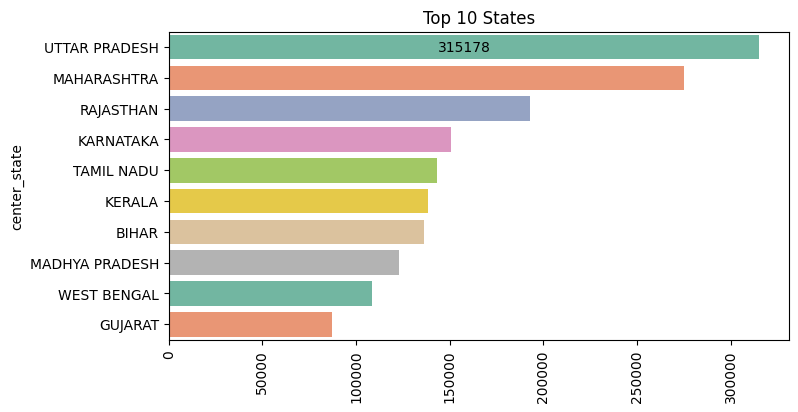

In [38]:
# Sample DataFrame creation (if you don't have the DataFrame ready)
# df = pd.DataFrame({
#     'center_state': ['Karnataka', 'Maharashtra', 'Gujarat', 'Karnataka', 'Maharashtra', 'Gujarat'],
#     'score': [450, 300, 500, 650, 700, 550]
# })

# Get top 10 states with the highest counts
top_10_states = df['center_state'].value_counts().nlargest(10)

# Create the bar chart
plt.figure(figsize=(8, 4))
ax = sb.barplot(x=top_10_states.values, y=top_10_states.index, hue=top_10_states.index, palette='Set2', dodge=False)

# Add center labels to the bars
ax.bar_label(ax.containers[0], label_type='center')

# Add a title
plt.title('Top 10 States')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


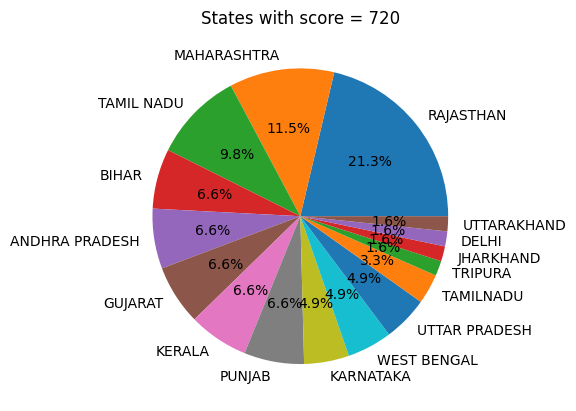

In [39]:
# Percentage of States that are having scores=720
max_scores=df[df['score']==720]
state_dist=max_scores['center_state'].value_counts(normalize=True)*100
plt.pie(state_dist,labels=state_dist.index,autopct='%1.1f%%')
plt.title("States with score = 720")
plt.show()

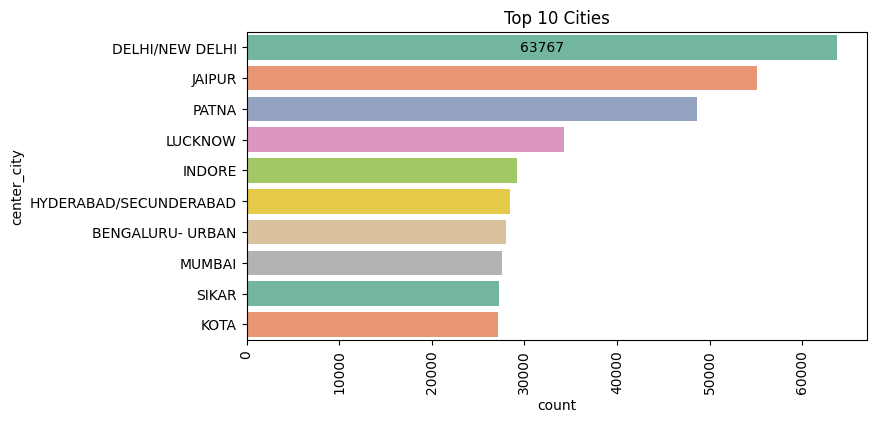

In [46]:
# Convert the top cities into a DataFrame for plotting
top_10_cities_df = top_10_cities.reset_index()
top_10_cities_df.columns = ['center_city', 'count']  # Renaming columns for clarity

# Create the bar chart
plt.figure(figsize=(8, 4))
ax = sb.barplot(data=top_10_cities_df, x='count', y='center_city', hue='center_city', palette='Set2', legend=False)

# Add center labels to the bars
ax.bar_label(ax.containers[0], label_type='center')  # Display values inside the bars

# Add a title
plt.title('Top 10 Cities')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()